In [25]:
import pandas as pd
import re

data = pd.read_pickle('../../data/trojans_dataset.pkl')

In [41]:
a = data['die.compiler'][1]
re.sub(r'\(.*','',a)

'Microsoft Visual C/C++'

In [52]:
data['die.linker'].astype('str').apply(lambda x: re.sub(r'\(.*','',x.lower())).value_counts()

microsoft linker    14077
unknown              3510
turbo linker         1572
gnu linker            691
nan                   102
polink                 40
lcc linker              5
watcom linker           2
borland tlink           1
Name: die.linker, dtype: int64

In [100]:
data['has-urls'] = data['urls'].apply(lambda x: len(x)>0)

In [ ]:
categoricals = ['exiftool.File-FileTypeExtension', 'exiftool.EXE-ObjectFileType']
numbers = ['exiftool.EXE-UninitializedDataSize']

In [57]:
data['exiftool.EXE-CharacterSet'].value_counts()

Unicode                                3605
Windows, Latin1                         803
ASCII                                    48
Windows, Latin2 (Eastern European)       12
Windows, Cyrillic                        10
Windows, Chinese (Simplified)            10
Windows, Taiwan (Big5)                    9
Unknown (04E9)                            3
Windows, Turkish                          3
Windows, Arabic                           2
Windows, Greek                            2
Unknown (036A)                            2
Windows, Korea (Shift - KSC 5601)         2
Unknown (??　㤀　㐀戀　)                        1
Windows, Japan (Shift - JIS X-0208)       1
Unknown (0352)                            1
Unknown (0409)                            1
Unknown (ABCD)                            1
Name: exiftool.EXE-CharacterSet, dtype: int64

In [53]:
data['die.linker'].astype('str').apply(lambda x: re.sub(r'\(.*','',x.lower())).value_counts()

microsoft linker    14077
unknown              3510
turbo linker         1572
gnu linker            691
nan                   102
polink                 40
lcc linker              5
watcom linker           2
borland tlink           1
Name: die.linker, dtype: int64

In [50]:
data['die.library'].astype('str').apply(lambda x: re.sub(r'\(.*','',x.lower())).value_counts()

nan          17904
.net          1597
mfc            175
autoit         142
qt              81
python          81
wxwidgets        8
fox pro          6
java             4
flexnet          1
flexlm           1
Name: die.library, dtype: int64

In [148]:
import numpy as np

#### Features importantes para serem estudadas mais a frente #####
#    static.pe.pe_sections, vt.json                              #
#----------------------------------------------------------------#

data_fil = data.filter(items=['cr32',
                              'exiftool.EXE-OSVersion',
                              'exiftool.EXE-LinkerVersion',
                              'static.pe.imported_dll_count',
#                               'static.pe.pe_timestamp',
#                               'vt.positives',
#                               'vt.modified_at.$date',                              
                              'exiftool.EXE-AssemblyVersion',
                              'exiftool.EXE-CodeSize',
                              'exiftool.EXE-FileSubtype',
                              'exiftool.EXE-FileVersionNumber',
                              'exiftool.EXE-ImageVersion',
                              'exiftool.EXE-InitializedDataSize',
                              'exiftool.EXE-ProductVersionNumber',
#                               'exiftool.EXE-TimeStamp',
                              'exiftool.EXE-UninitializedDataSize',
                              'exiftool.File-FileSize',
                              'mss_coordinates.BawaneH',
                              'mss_coordinates.MultiEncryptWinDLL',
                              'mss_coordinates.Sayonara',
                              'mss_coordinates.WhatsappSLDLL',
                              'signinfo.valid',
                              'size',
                              'vt.total_scans'])
data_fil = data_fil.fillna(0)
# data_fil['static.pe.pe_timestamp'] = data_fil['static.pe.pe_timestamp'].str.replace('\W+', '').fillna(0).astype(int)
# data_fil['vt.modified_at.$date'] = data_fil['vt.modified_at.$date'].replace('\W+', '').fillna(0).astype(int)
data_fil['signinfo.valid'] = data_fil['signinfo.valid'].astype(np.int)
data_fil['exiftool.File-FileSize'] = data_fil['exiftool.File-FileSize'].str.replace(r'\D+', '').astype('int')
# data_fil['exiftool.EXE-TimeStamp'] = data_fil['exiftool.EXE-TimeStamp'].str.replace('\W+', '').fillna(0).astype(int)
data_fil['exiftool.EXE-FileVersionNumber'] = data_fil['exiftool.EXE-FileVersionNumber'].str.replace('\W+', '').fillna(0).astype(int)
data_fil['exiftool.EXE-AssemblyVersion'] = data_fil['exiftool.EXE-AssemblyVersion'].str.replace('\W+', '').fillna(0).replace('', 0).astype(int)
data_fil['exiftool.EXE-ProductVersionNumber'] = data_fil['exiftool.EXE-ProductVersionNumber'].str.replace('\W+', '').fillna(0).astype(int)
# data_fil['mss_coordinates.WhatsappSLDLL'] = data_fil['mss_coordinates.WhatsappSLDLL'].replace('\W+', '').fillna(0).replace('', '0').astype(int)
# data_fil['mss_coordinates.Sayonara'] = data_fil['mss_coordinates.Sayonara'].replace('\W+', '').fillna(0).replace('', '0').astype(int)
# data_fil['mss_coordinates.MultiEncryptWinDLL'] = data_fil['mss_coordinates.MultiEncryptWinDLL'].replace('\W+', '').fillna(0).replace('', '0').astype(int)
# data_fil['mss_coordinates.BawaneH'] = data_fil['mss_coordinates.BawaneH'].replace('\W+', '').fillna(0).replace('', '0').astype(int)

# -------------- Creating the label value -------------------
data_fil['ismalware']  = (data_fil['vt.total_scans'] >= 50).astype(np.int)
data_fil.shape
#------------------------------------------------------------

data_fil

,exiftool.EXE-OSVersion,exiftool.EXE-LinkerVersion,static.pe.imported_dll_count,exiftool.EXE-AssemblyVersion,exiftool.EXE-CodeSize,exiftool.EXE-FileSubtype,exiftool.EXE-FileVersionNumber,exiftool.EXE-ImageVersion,exiftool.EXE-InitializedDataSize,exiftool.EXE-ProductVersionNumber,exiftool.EXE-UninitializedDataSize,exiftool.File-FileSize,mss_coordinates.BawaneH,mss_coordinates.MultiEncryptWinDLL,mss_coordinates.Sayonara,mss_coordinates.WhatsappSLDLL,signinfo.valid,size,vt.total_scans,ismalware
0,5.1,11.0,0.0,0,570880,0,0,0.0,1897472,0,0,24,1.340882,0.860378,1.891786,1.214612,0,2498560,68.0,1
1,5.0,9.0,1.0,0,116736,0,0,0.0,230912,0,0,201,0.521454,0.442842,0.715546,0.575342,0,206123,65.0,1
2,6.1,9.0,0.0,0,13824,0,0,6.1,3584,0,0,36,0.044696,0.094895,0.137228,0.091324,0,36864,0.0,0
3,4.0,5.0,10.0,0,389120,0,0,0.0,40960,0,0,459,3.501192,1.094452,1.813370,1.479452,0,470016,68.0,1
4,6.1,9.0,0.0,0,260608,0,0,6.1,17408,0,0,288,1.072706,0.411210,0.646932,0.529680,0,294912,0.0,0
5,5.1,10.0,0.0,0,660480,0,0,0.0,454656,0,0,1104,1.668653,0.645284,0.950794,0.849315,0,1130496,0.0,0
6,5.0,2.25,40.0,0,10261504,0,1000,0.0,3190272,1000,0,13,29.588796,76.004302,51.205646,92.584475,0,13595000,62.0,1
7,5.0,9.0,15.0,0,1247232,0,0,0.0,1505280,0,0,26,1.519666,1.701778,1.313468,1.963470,0,2753536,63.0,1
8,6.1,9.0,0.0,0,93696,0,0,6.1,27136,0,0,128,0.283075,0.341621,0.529308,0.429224,0,131072,0.0,0
9,5.2,10.0,3.0,0,2048,0,803113,0.0,7168,803113,0,16,0.014899,0.050610,0.107822,0.063927,1,16808,0.0,0


In [149]:
# data_fil['exiftool.EXE-AssemblyVersion'].str.replace('\W+', '').fillna(0).replace('', '0').astype(int)
# data_fil['exiftool.EXE-ProductVersionNumber'].str.replace('\W+', '').fillna(0).astype(int)
# data_fil['signinfo.valid']

## Spliting Dataframe / Feature processing

In [150]:
from sklearn.model_selection import train_test_split

features = data_fil.columns.drop(['ismalware', 'vt.total_scans'])
# noise_features = df_train.head(1).filter(regex='.*noise.*', axis=1).columns

X = data_fil[features].values
y = data_fil['ismalware'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,
                                                    stratify=y, random_state=1995)

In [151]:
np.unique(y)

array([0, 1])

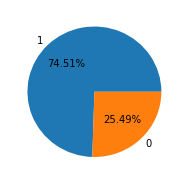

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
data_fil['ismalware'].value_counts().plot(
    kind='pie', autopct='%.2f%%', figsize=(3, 3), label='')

## K-fold - Cross Validation

In [153]:
from sklearn.model_selection import StratifiedKFold
# n_classes = df_train.device.nunique()

cv = StratifiedKFold(5, True, 1995)

print("Feautures: {}".format(len(features)))

# n_classest = df_test.device.nunique()

# print("Feautures: {}".format(len(lbp_features)))
# df_train.device.unique()

Feautures: 18


## Random-Forest

In [154]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

classifier = RandomForestClassifier(100, random_state=1995)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print(scores, scores.mean())

[0.80029993 0.80825    0.8065     0.809      0.80620155] 0.8060502950812685
CPU times: user 7.39 s, sys: 0 ns, total: 7.39 s
Wall time: 7.4 s


In [156]:
classifier.fit(X_train,y_train)

class1 = classifier.predict(X_test)
class1.size

4000

In [157]:
# for i in class1:
#     print(class1[i], '---', y_test[i]).

In [158]:
np.count_nonzero(y_test==1), np.count_nonzero(class1==1)

(2980, 3111)

In [159]:
classifier.feature_importances_*100

array([9.60131333e+00, 7.67416401e+00, 1.35069403e+01, 3.84201219e-01,
       8.33197335e+00, 1.27316640e-02, 3.85109343e+00, 1.40158039e+00,
       6.44634775e+00, 2.75482437e+00, 3.69752616e+00, 5.68287203e+00,
       6.59232600e+00, 8.10996889e+00, 7.14683745e+00, 5.76430004e+00,
       5.15144219e-01, 8.52585537e+00])

In [161]:
features[0]

'exiftool.EXE-OSVersion'

In [134]:
data_fil['exiftool.EXE-TimeStamp'].apply(lambda x: round(x/10000000000)).value_counts()

20170731    2644
20170927    1727
20171104    1722
19920619     826
20170404     662
20160503     645
20170720     616
20170707     348
0            298
20090713     297
20090909     194
20101120     182
20121129     127
20170512      76
20170417      63
20140625      63
20120607      57
20110516      49
20110614      48
20160103      40
20160714      40
20091205      40
20141218      39
20171222      36
20110430      33
20041217      33
20111216      32
20160814      32
20171215      32
20161011      31
            ... 
19731016       1
20081223       1
20120122       1
20111029       1
20841002       1
20671015       1
21060129       1
19980822       1
20040211       1
20240913       1
20130319       1
19971015       1
20140528       1
20251114       1
20740421       1
20310503       1
20400611       1
19880417       1
19741117       1
20060601       1
20860426       1
20830609       1
19700105       1
20570502       1
19880321       1
20490623       1
19980630       1
20150613      

In [164]:
data_fil['exiftool.EXE-OSVersion']

0        5.1
1        5.0
2        6.1
3        4.0
4        6.1
5        5.1
6        5.0
7        5.0
8        6.1
9        5.2
10       4.0
11       6.0
12       6.1
13       4.0
14       6.1
15       4.0
16       5.1
17       6.1
18       4.0
19       6.0
20       4.0
21       4.0
22       4.0
23       5.0
24       6.3
25       6.1
26       6.1
27       6.1
28       6.1
29       4.0
        ... 
19970    5.1
19971    5.1
19972    6.0
19973    5.1
19974    6.0
19975    4.0
19976    4.0
19977    5.1
19978    5.1
19979    5.0
19980    5.1
19981    4.0
19982    5.1
19983    5.0
19984    5.0
19985    4.0
19986    5.1
19987    5.1
19988    6.0
19989    5.0
19990    5.0
19991    6.0
19992    5.1
19993    1.0
19994      0
19995    6.0
19996    5.1
19997    6.0
19998    5.1
19999    4.0
Name: exiftool.EXE-OSVersion, Length: 20000, dtype: object